In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
xlsx = pd.read_excel('data/online_retail.xlsx')
xlsx.to_csv('data/online_retail.csv', encoding='utf-8', index=False)
df = pd.read_csv('data/online_retail.csv')

In [4]:
df.dropna(inplace=True)

In [5]:
df.drop_duplicates(inplace = True)

## Tratando textos do *dataset*

In [6]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [8]:
np_description = df['Description'].unique()
i = 0
for i in range(df['Description'].unique().size):
    df.replace(np_description[i],float(i),inplace = True)


In [9]:
np_description = df['Country'].unique()
i = 0
for i in range(df['Country'].unique().size):
    df.replace(np_description[i],float(i),inplace = True)


In [10]:
np_description = df['StockCode'].unique()
i = 0
for i in range(df['StockCode'].unique().size):
    df.replace(np_description[i],float(i),inplace = True)


In [11]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,0.0,0.0,6,2010-12-01 08:26:00,2.55,17850.0,0.0
1,536365,1.0,1.0,6,2010-12-01 08:26:00,3.39,17850.0,0.0
2,536365,2.0,2.0,8,2010-12-01 08:26:00,2.75,17850.0,0.0
3,536365,3.0,3.0,6,2010-12-01 08:26:00,3.39,17850.0,0.0
4,536365,4.0,4.0,6,2010-12-01 08:26:00,3.39,17850.0,0.0


Removendo o número e data do pedido.

In [12]:
df = df.drop(['InvoiceNo','InvoiceDate'], axis=1)
df.head()

,StockCode,Description,Quantity,UnitPrice,CustomerID,Country
0,0.0,0.0,6,2.55,17850.0,0.0
1,1.0,1.0,6,3.39,17850.0,0.0
2,2.0,2.0,8,2.75,17850.0,0.0
3,3.0,3.0,6,3.39,17850.0,0.0
4,4.0,4.0,6,3.39,17850.0,0.0


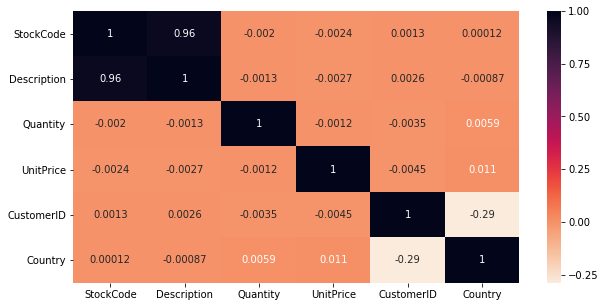

In [13]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot=True,cmap=sns.cm.rocket_r)

In [14]:
df = df.drop(['StockCode'], axis=1)


In [15]:
df.head()

,Description,Quantity,UnitPrice,CustomerID,Country
0,0.0,6,2.55,17850.0,0.0
1,1.0,6,3.39,17850.0,0.0
2,2.0,8,2.75,17850.0,0.0
3,3.0,6,3.39,17850.0,0.0
4,4.0,6,3.39,17850.0,0.0


## Mean Shift

Clusterização em MEanShift visa descobrir bolhas em uma densidade suave de amostras. É um algoritmo que funciona através da atualização de candidatos para centroids para ser a média dos pontos denro da região.

Dado um candidato centróide **x_i** para iteração **t** em que **m** é a média, o candidato é atualizado de acordo com a seguinte equação:

![fórmula](http://scikit-learn.org/stable/_images/math/df67cad6c90923bd6d5dd1ba1cc98b73ba772bd8.png)

![grafico](http://scikit-learn.org/stable/_images/sphx_glr_plot_mean_shift_001.png)

In [16]:
import numpy as np
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.datasets.samples_generator import make_blobs

In [18]:
bandwidth = estimate_bandwidth(df, quantile=0.2, n_samples=100)

In [19]:
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)

In [21]:
ms.fit(df)

MeanShift(bandwidth=1408.799427957311, bin_seeding=True, cluster_all=True,
     min_bin_freq=1, n_jobs=1, seeds=None)

In [22]:
labels = ms.labels_

In [23]:
cluster_centers = ms.cluster_centers_

In [24]:
labels_unique = np.unique(labels)

In [25]:
n_clusters_ = len(labels_unique)

In [37]:
print("Número de clusters estimados : %d" % n_clusters_)

Número de clusters estimados : 18
